In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
data = pd.read_csv("goog.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [5]:
training_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

In [6]:
def create_sequences(data, time_steps=6):
    x = []
    y = []
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(x), np.array(y)

In [7]:
x_train, y_train = create_sequences(train_data)
x_test, y_test = create_sequences(test_data)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(x_train, y_train, epochs=50, batch_size=4)

Epoch 1/50


C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.1462
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0364
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.0452
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0255
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0315
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0272
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0253
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0238
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0262
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0268
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0347
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0234
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0247
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0254
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0206
Ep

In [10]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  11.016357358816956
MSE:  125.19705848273033
RMSE:  11.189149140248794


In [12]:
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
x_pred = []
x_pred.append(last_6_days_scaled)
x_pred = np.array(x_pred)
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))

In [13]:
pred_price = model.predict(x_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted price for the next day:  [[838.8428]]


C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


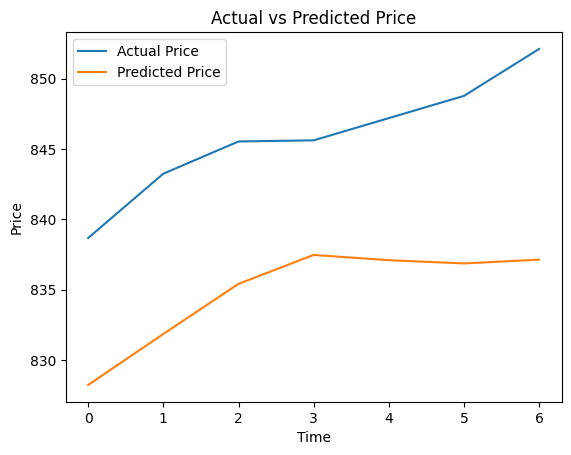

In [14]:
# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()